# Preamble

Title: *Topic Labelling Analysis*

Author: *Thyago Mota*

Email: *tmota at msudenver.edu*

Last Update: *2021-11-10*

# Introduction

This report presents the results of an analysis of the most common topics found in news headlines published by ABC (Australian Broadcasting Corporation) over a period of eighteen years. 



# Dataset

The dataset for this report can be found at [https://www.kaggle.com/therohk/million-headlines](https://www.kaggle.com/therohk/million-headlines). It consists of a CSV of 1,226,258 lines organized in only two columns: publish_date and headline_text. 

# Summary Statistics

## Headlines per Year 

In [8]:
# Google drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Number of years in dataset: 18
Headlines per year:
2003 63997
2004 72674
2005 73124
2006 66901
2007 77174
2008 79991
2009 76444
2010 74931
2011 77778
2012 89008
2013 91928
2014 81531
2015 77290
2016 61574
2017 47511
2018 40102
2019 34060
2020 40240
The avg. number of headlines per year was 68125.44
The std. of the number of headlines per year was 17069.33


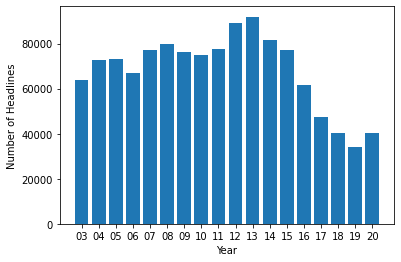

In [ ]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: Headlines per Year

from google.colab import drive
import csv
import statistics as stats
import matplotlib.pyplot as plt 

# definitions/parameters
DATA_FOLDER = '/content/drive/MyDrive/Colab Datasets/abc_news_dataset/'
CSV_FILE_NAME = 'abcnews-date-text.csv'

with open(DATA_FOLDER + CSV_FILE_NAME, 'rt') as csv_file:
  reader = csv.reader(csv_file)
  header = next(reader)
  years_count = {}
  for row in reader:
    year = int(row[0][:4])
    if year not in years_count:
      years_count[year] = 0
    years_count[year] += 1
  print('Number of years in dataset:', len(years_count))
  print('Headlines per year:')  
  for year in years_count:
    print(year,years_count[year])
  print('The avg. number of headlines per year was', '{:.2f}'.format(stats.mean(years_count.values())))
  print('The std. of the number of headlines per year was', '{:.2f}'.format(stats.stdev(years_count.values())))
  years = [ str(year)[2:] for year in years_count.keys()]
  plt.bar(years, height=years_count.values())
  plt.xticks(years)
  plt.xlabel('Year')
  plt.ylabel('Number of Headlines')
  plt.show()


# NLP Analysis

## News Headline Corpora / Year

To speed-up the analysis a 5% sampling was perfomed when computing the corpora of news headlines.  


In [9]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: NLP (news headline corpora per year)

import csv, random

# definitions/parameters
DATA_FOLDER = '/content/drive/MyDrive/Colab Datasets/abc_news_dataset/'
CSV_FILE_NAME = 'abcnews-date-text.csv'
SAMPLE_RATE = 5 # like in 5%

with open(DATA_FOLDER + CSV_FILE_NAME, 'rt') as csv_file:
  reader = csv.reader(csv_file)
  header = next(reader)
  headline_corpora = [ '' for i in range(18) ]
  for row in reader:
    if random.randint(1, 100) <= SAMPLE_RATE:
      year = int(row[0][:4])
      headline = row[1]
      headline_corpora[year - 2003] += headline + ". "

## Top Words / Year 

In [11]:
# NLTK package download
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: NLP (top words per year)

import string, operator
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

YEAR = 2020

stop = set(stopwords.words('english') + list(string.punctuation))
word_tokens = word_tokenize(headline_corpora[YEAR - 2003])
word_tokens = [ word for word in word_tokens if word not in stop ]

count_vect = CountVectorizer()
bag_of_words = count_vect.fit_transform(word_tokens).toarray()
words = count_vect.get_feature_names()
words_freq = {}
for row in bag_of_words:
  for i in range(len(row)):
    word = words[i]
    if word not in words_freq:
      words_freq[word] = 0
    words_freq[word] += row[i]
words_freq = sorted(words_freq.items(), key=lambda item: item[1], reverse=True)
print("Top 10 words found in news headlines in", YEAR)
for i in range(10):
  print(words_freq[i])



Top 10 words found in news headlines in 2020
('coronavirus', 435)
('covid', 135)
('australia', 101)
('19', 94)
('nsw', 90)
('victoria', 84)
('new', 79)
('police', 72)
('queensland', 72)
('us', 56)


## Top Bigrams / Year 

In [ ]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: NLP (top bigrams per year)

import string, operator
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer

YEAR = 2017

sent_tokens = sent_tokenize(headline_corpora[YEAR - 2003])
count_vect = CountVectorizer(stop_words="english", ngram_range=(2,2))
bag_of_bigrams = count_vect.fit_transform(sent_tokens).toarray()
bigrams = count_vect.get_feature_names()
bigrams_freq = {}
for row in bag_of_bigrams:
  for i in range(len(row)):
    bigram = bigrams[i]
    if bigram not in bigrams_freq:
      bigrams_freq[bigram] = 0
    bigrams_freq[bigram] += row[i]
bigrams_freq = sorted(bigrams_freq.items(), key=lambda item: item[1], reverse=True)
print("Top 10 bigrams found in news headlines in", YEAR)
for i in range(10):
  print(bigrams_freq[i])

Top 10 bigrams found in news headlines in 2017
('donald trump', 38)
('north korea', 19)
('year old', 14)
('malcolm turnbull', 11)
('sex marriage', 11)
('big country', 10)
('speaks business', 9)
('wa election', 9)
('barnaby joyce', 8)
('cyclone debbie', 8)


## Top Topics / Year

In [ ]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: NLP (top topics per year)

import string, operator
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

YEAR = 2011

# returns the indices of the top n values of a numpy array
def top_indices(data, n):
  return data.argsort()[-1*n:][::-1]

sent_tokens = sent_tokenize(headline_corpora[YEAR - 2003])
count_vect = CountVectorizer(stop_words="english", ngram_range=(2,2))
bag_of_bigrams = count_vect.fit_transform(sent_tokens).toarray()
bigrams = count_vect.get_feature_names()
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(bag_of_bigrams)
print("Top topics found in news headlines in", YEAR)
for i, topic in enumerate(lda.components_):
  print ("Topic ", i, ", ".join(bigrams[j] for j in top_indices(topic, 5)))

Top topics found in news headlines in 2011
Topic  0 basin plan, carbon tax, man charged, aged care, man shot
Topic  1 abc weather, abc sport, gold coast, faces court, sri lanka
Topic  2 kohler report, man jailed, drink driving, car crash, live exports
Topic  3 abc business, business news, news market, market analysis, abc entertainment
Topic  4 asylum seekers, pleads guilty, christmas island, avoids jail, face court


## Sentiment Fluctuation over the Years

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


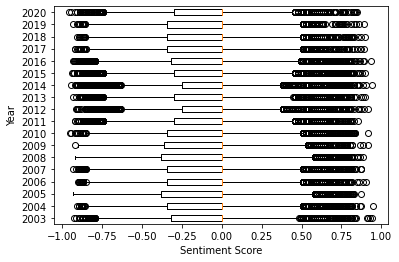

In [22]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: NLP (sentiment fluctuation over the years)

import nltk
from nltk.tokenize import sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt 
import statistics as stats

sia = SentimentIntensityAnalyzer()
sent_year = [ [] for i in range(18) ]
for year in range(2003, 2021):
  corpus = headline_corpora[year - 2003]
  sent_tokens = sent_tokenize(headline_corpora[year - 2003])
  for sent in sent_tokens:
    score = sia.polarity_scores(sent)["compound"]
    sent_year[year - 2003].append(score)
plt.boxplot(sent_year, vert=False)
plt.yticks(list(range(1, 19)), list(range(2003,2021)))
plt.xlabel('Sentiment Score')
plt.ylabel('Year')
plt.show()
